<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_on_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

-----------------------------------------------------------------------------
##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**
-----------------------------------------------------------------------------

#**Introduction**

##**What is a Stock?**


### A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.





---


###The dataset of YES BANK has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month of around 180 observations. It contains the following features:

### 1. **Date**: It denotes date of investment done (in our case we have month and year).

### 2. **Open**: The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

### 3. **High**: The high is the highest price at which a stock traded during a period.

### 4. **Low**: The low is the lowest price at which a stock traded during a period.

### 5. **Close**: Close refers to the price of an individual stock when the stock exchange closed for the day.


---


##Importing and Loading data

In [91]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
#Importing 'Yest Bank' Data Set

stock_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Yes Bank Stock Closing Price Prediction- Abhishek Shubham/data_YesBank_StockPrices.csv')

## Exploring Data Frame

In [3]:
#Checking the top 5 observations
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
#Checking botton 5 observations
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
#Exploring the data types and 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Findings:**

- There are total 185 records/ rows and 5 columns
- Most columns are of type float and only "Date" Column is of type object.
- We would need to conver the Date column from object to date type.


In [6]:
# Let's check the summary of numerical features
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
#Shape of DF
stock_df.shape

(185, 5)

In [8]:
#Checking for null values
stock_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Luckily there is no null values in our Df. This save's time and efforts to deal with null values seperately!


In [9]:
#Checking for Duplication in our Dataset
len(stock_df[stock_df.duplicated()])


0

In [10]:
#Convertting Date column from object to date type(Data wrangling)
stock_df['Date']= pd.to_datetime(stock_df['Date'], format= '%b-%y')

In [11]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


#**Exploratory Data Analysis**

##**Univariate Analysis**

<Figure size 576x360 with 0 Axes>

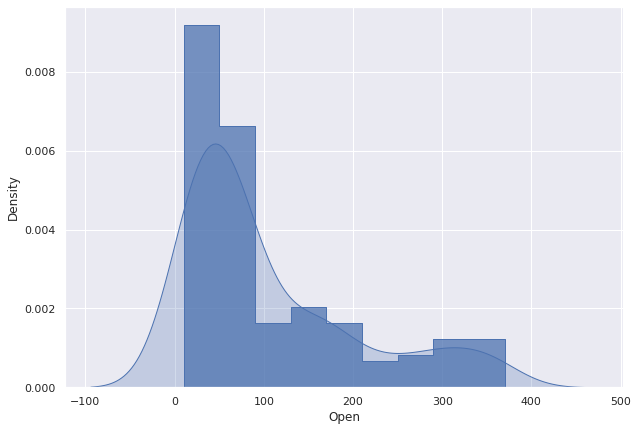

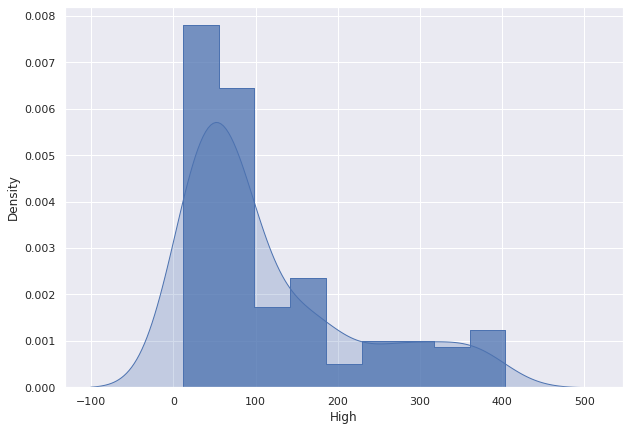

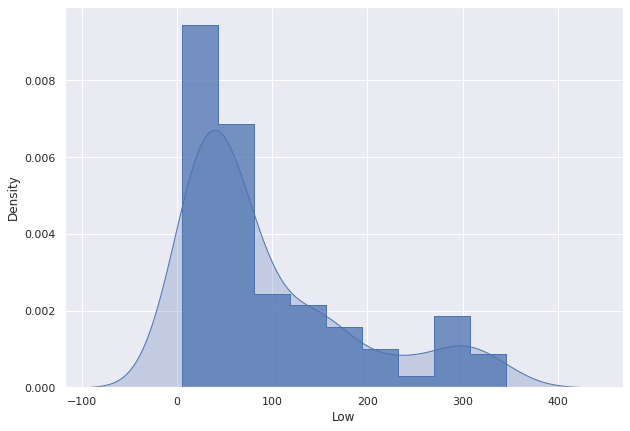

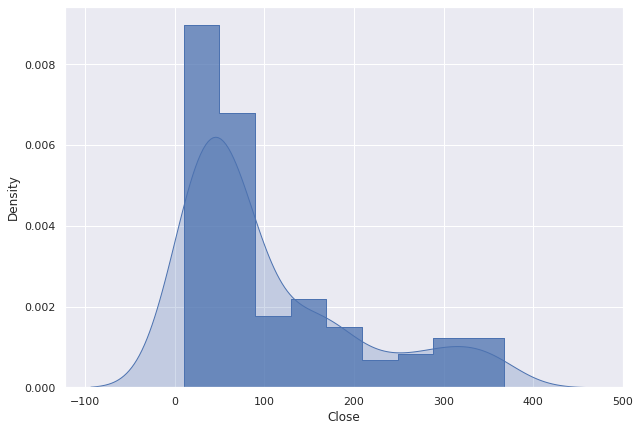

In [12]:
# Plotting Distributions of all the numerical variables
plt.figure(figsize= [8, 5])
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(stock_df[col], ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(stock_df[col], fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**

- All the features are skewed towards right.
- In this case we would need to convert it into normal distribution to get a better accuracy from our model. 

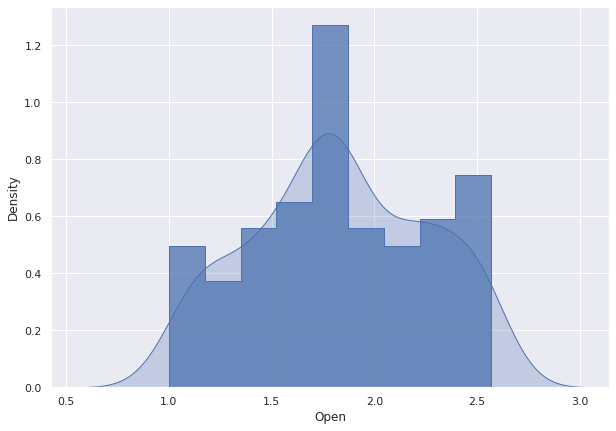

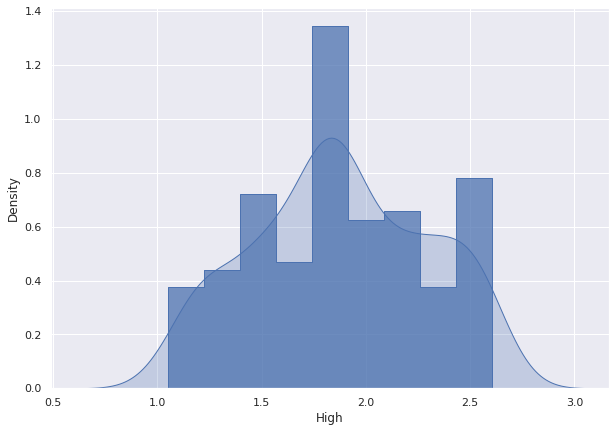

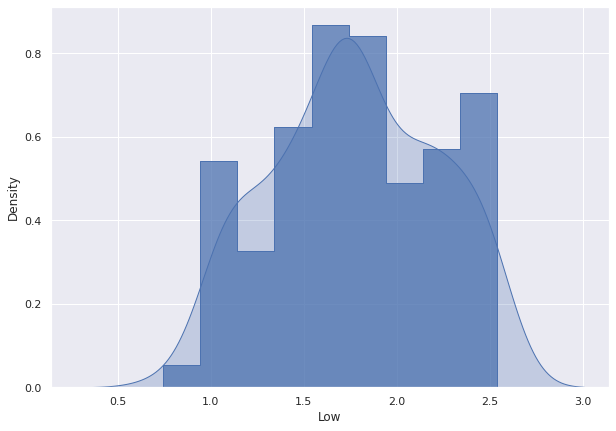

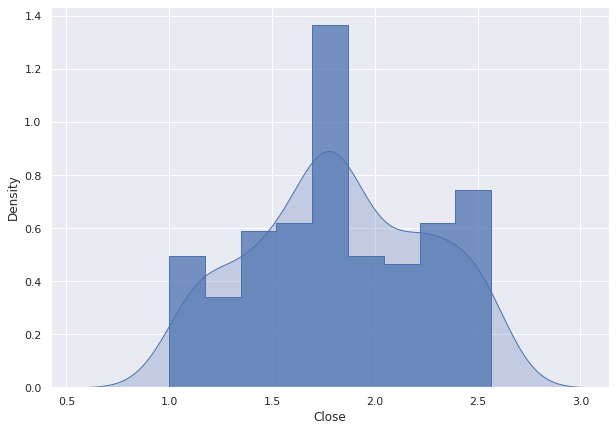

In [13]:
#Log transformation of all numerial features 
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(np.log10(stock_df[col]), ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(np.log10(stock_df[col]), fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**
- After the log transformation the distribution of our Data Set turned into symmetrical.

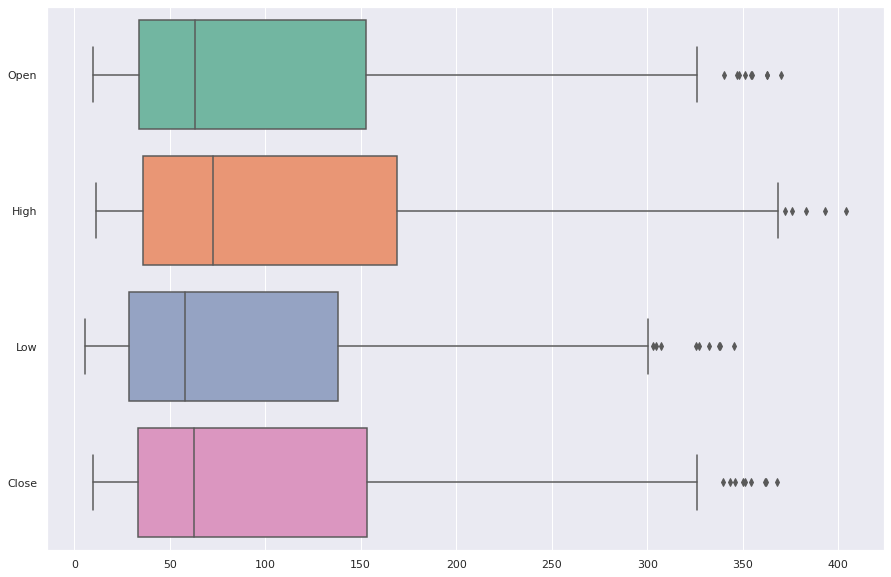

In [14]:
#Boxplot comparision of all the numerical features
plt.figure(figsize= (15, 10))
sns.boxplot(data=stock_df, orient="h", palette="Set2")

**Findings**:
- All the features has median values between Rs 50 to Rs 80
- There is a presence of outliers in all the features variables
- Feature "High" has median value which is Rs 72.55 

##**Multivariate Analysis**

In [15]:
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [31]:
Yearly_df= stock_df.groupby('Date')['Close'].mean().reset_index()
Yearly_df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


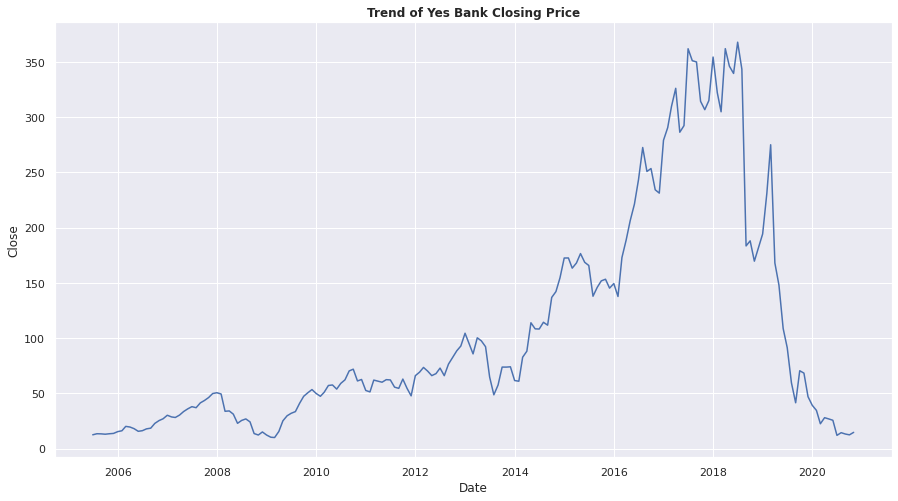

In [30]:
plt.figure(figsize= [15, 8])
plt.title("Trend of Yes Bank Closing Price", fontweight = 'bold')
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.



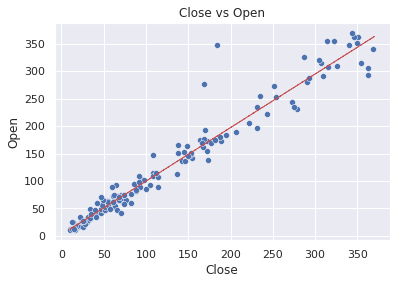

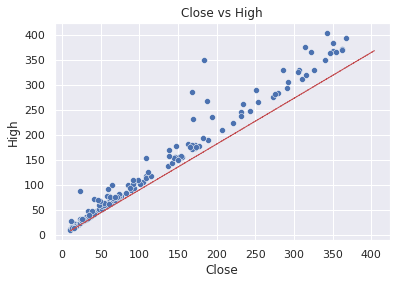

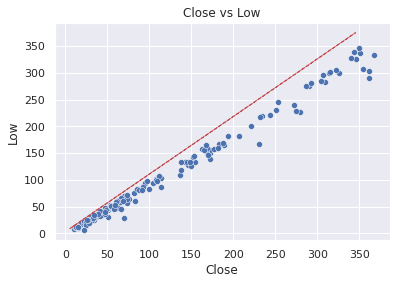

In [18]:
#Now let's check the relationship of each features with our dependent variable
Independent_variables= list(stock_df.drop('Close', axis= 1).describe().columns)
for col in Independent_variables:
  fig, ax = plt.subplots()
  sns.scatterplot(data= stock_df, x= 'Close', y= col, ax= ax)
  ax.set_title(f'Close vs {col}')
  z = np.polyfit(stock_df[col], stock_df['Close'], 1)
  y_hat = np.poly1d(z)(stock_df[col])
 
  ax.plot(stock_df[col], y_hat, "r--", lw=1)

**Findings:**

- All independent features have linear relationship with the dependent variable.

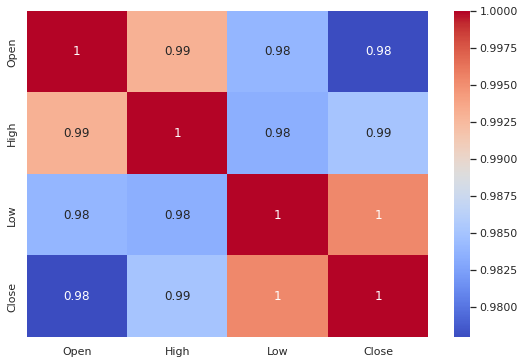

In [19]:
#Let's get the heatmmap of the Numerical Variables
plt.figure(figsize= (9, 6))
Coorelation_matrix= stock_df.corr()
sns.heatmap(Coorelation_matrix, annot= True, cmap= 'coolwarm')

**Findings:**

- Looking at the heatmap we can say that all the features are highly coorelated. 
- Feature 'Low' has highest coorelation of 1 with dependent variable.
- There exists multicoolinearity between Independent variables which means that we would need to remove one or more features from our dataset during feature selection. 
- Problem due to Multicollinearity is that it generates high variance of the estimated coefficients and hence, the coefficient estimates corresponding to those interrelated explanatory variables will not be accurate in giving us the actual picture. They can become very sensitive to small changes in the model.

#**Feature Engineering**

Now we move towards some feature engineering and see what we can implement in our dataset.

In [21]:
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [22]:
# Let's create a month and year column from the Date column
stock_df['Month']= stock_df['Date'].dt.month
stock_df['Year']= stock_df['Date'].dt.year


In [23]:
stock_df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [25]:
#Since the Date column cannon be used in our Model so we will convert it as index and drop the column
stock_df.index= stock_df['Date']
stock_df.drop('Date', axis= 1, inplace= True)

In [26]:
stock_df.head()

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005
2005-08-01,12.58,14.88,12.55,13.42,8,2005
2005-09-01,13.48,14.87,12.27,13.30,9,2005
2005-10-01,13.20,14.47,12.40,12.99,10,2005
2005-11-01,13.35,13.88,12.88,13.41,11,2005


Now we can see that the 'Date' column is used as index.

### <b> Let's check how <code>Shift()</code> function predict Closing price of *Yes Bank* further, we'll test our model with recent dataset.

In [27]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 1
stock_df['Prediction'] = stock_df[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
stock_df.head(3)

,Open,High,Low,Close,Month,Year,Prediction
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005,13.42
2005-08-01,12.58,14.88,12.55,13.42,8,2005,13.30
2005-09-01,13.48,14.87,12.27,13.30,9,2005,12.99


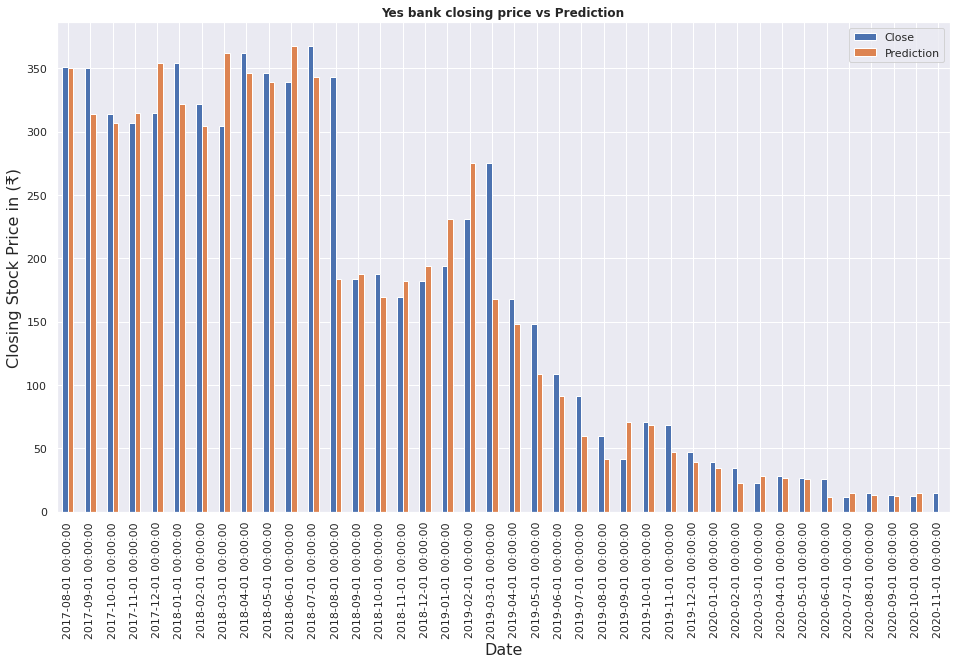

In [29]:
#Closing price vs prediction
stock_df[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,9))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

In [38]:
# drop prediction field
stock_df.drop('Prediction',axis = 1,inplace = True)

#**Feature Selection**

Now let's test for multicoolinearity and select the features which should yield best performance with our model's.

In [39]:
#Removing Multicollinearity between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif['Variables']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif)

In [41]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Since 'Open' column has the highest VIF so let's drop it first and recheck for VIF again.

In [42]:
stock_df.drop('Open', axis= 1, inplace= True)

In [43]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


In this case let's drop the **High** column as **Low** is slightly more coorelated with our Dependent Variable **Close**.

In [44]:
stock_df.drop('High', axis= 1, inplace= True)

In [46]:
stock_df.head()

,Low,Close,Month,Year
Date,,,,
2005-07-01,11.25,12.46,7,2005
2005-08-01,12.55,13.42,8,2005
2005-09-01,12.27,13.30,9,2005
2005-10-01,12.40,12.99,10,2005
2005-11-01,12.88,13.41,11,2005


After testing for Multicoolinearity with the dependent Variable **Close**, we are left with following independent variables **Low**, **Month**, **Year**

#**One Hot Encoding**

One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning. Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.

**This is perhaps better explained by an image:**

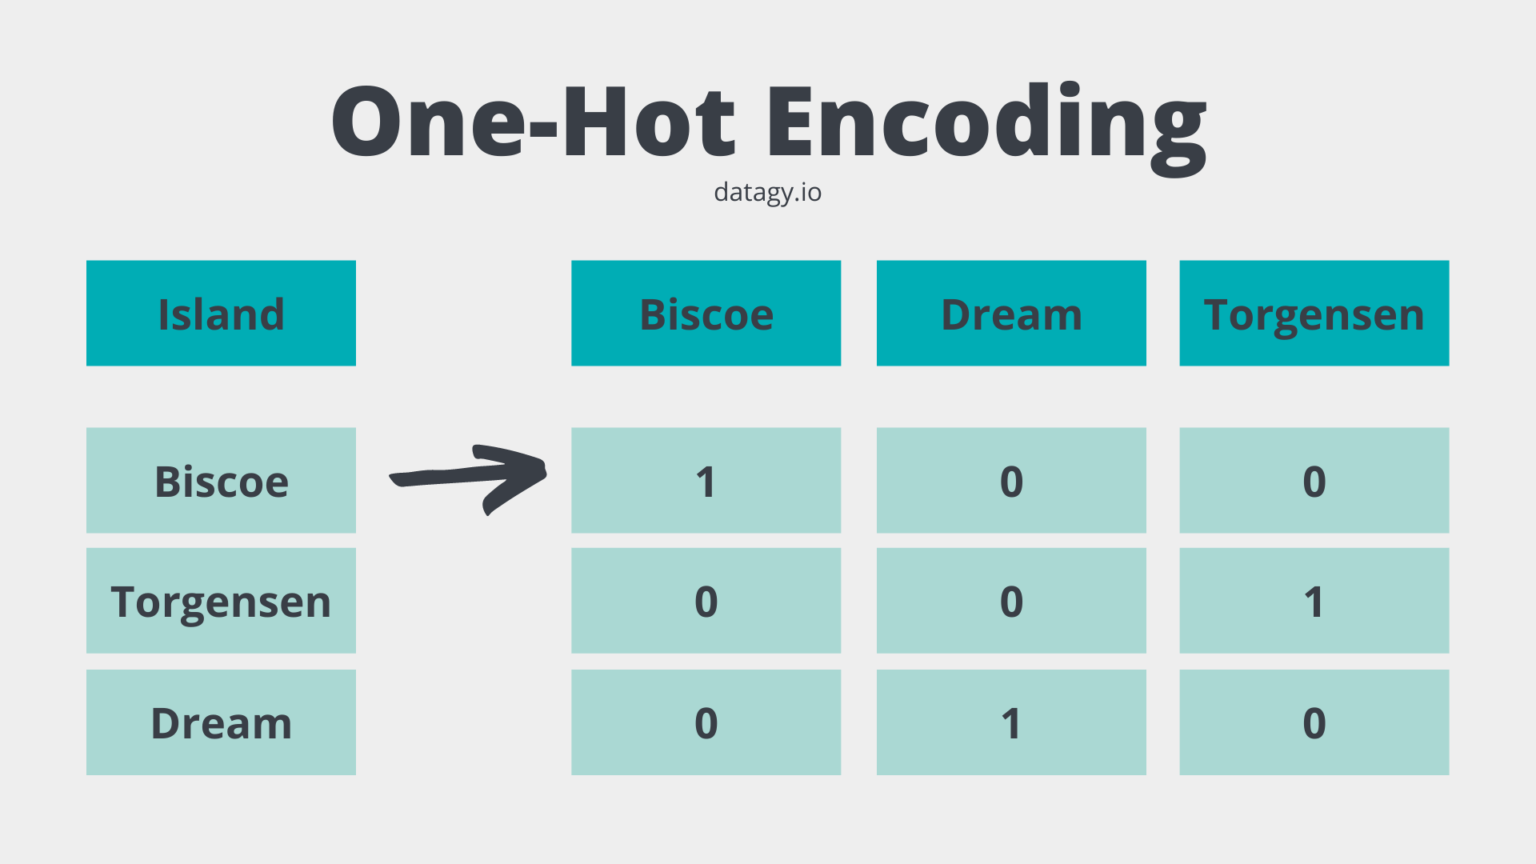

In [47]:
##One hot encoding of Year column
dataset_pr = pd.get_dummies(stock_df, columns=["Year"])

In [48]:
dataset_pr.head()

,Low,Close,Month,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,
2005-07-01,11.25,12.46,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.55,13.42,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,12.27,13.30,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-10-01,12.40,12.99,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-11-01,12.88,13.41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Great! After "One HOt Encoding", we can now use the categories in 'Year' column as an individual features for our model.

##**Standardizing the data**

In [50]:
independent_features= [col for col in dataset_pr if col not in ['Close', 'Month']]
len(independent_features)

17

In [53]:
#applying zscore to selected independent variables 
X = round(dataset_pr[independent_features].apply(zscore),3)

#applying log on dependent variable 
y = np.log10(dataset_pr['Close'])

In [55]:
X.head()

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [56]:
y.head()

Date
2005-07-01    1.095518
2005-08-01    1.127753
2005-09-01    1.123852
2005-10-01    1.113609
2005-11-01    1.127429
Name: Close, dtype: float64

##**Train Test Spilit**

In [69]:
#Spilitting the DataSet into train and test set's

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [77]:
#Creating DataFrames of train and test dataset
train_df= pd.DataFrame(X_train,y_train)
test_df= pd.DataFrame(10**y_test)
test_df.rename(columns= {'Close': 'Actual Closing Price'}, inplace= True)

#**Linear Regression**

In [63]:
#fitting the data into Regression model
reg= LinearRegression().fit(X_train, y_train)

In [65]:
reg.score(X_train, y_train)

0.9403650204419233

In [66]:
reg.intercept_

-58875444889.93402

In [67]:
reg.coef_

array([3.05309444e-01, 7.90575959e+12, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.05553484e+13])

In [81]:
#Predict y_test on the basis of train sets
y_pred = reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.41558838 2.13433838 1.83746338 2.10699463 1.79840088 1.53277588
 2.40777588 1.24371338 1.09527588 2.31011963 2.53668213 1.97808838
 2.16949463 1.71246338 2.67730713 2.47027588 1.82965088 1.40386963
 2.25152588 1.75933838 1.33746338 2.02105713 2.14996338 1.77886963
 2.34918213 1.79840088 2.45074463 1.09527588 2.00152588 1.69293213
 2.71636963 2.46636963 1.87652588 2.21246338 1.55621338 1.75152588
 2.49371338]


In [85]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(y_test,data)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("The model performance for test set:")
  print("--------------------------------------")
  print("Mean Squared Error: ",MSE)
  print("Root Mean Squared Error: ",RMSE)
  print("R2: ",r2)
  print("Adjusted R2: ",adjusted_r2)
  return

In [86]:
evaluation_metrics(y_pred)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.008378716531125619
Root Mean Squared Error:  0.09153532941507131
R2:  0.9550214108859424
Adjusted R2:  0.9147774100996803


In [87]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head(3)

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,26.036846
2015-12-01,145.23,136.250586
2019-12-01,46.95,68.780191


In [93]:
#Mean Absolute Error
MAE  = mean_absolute_percentage_error

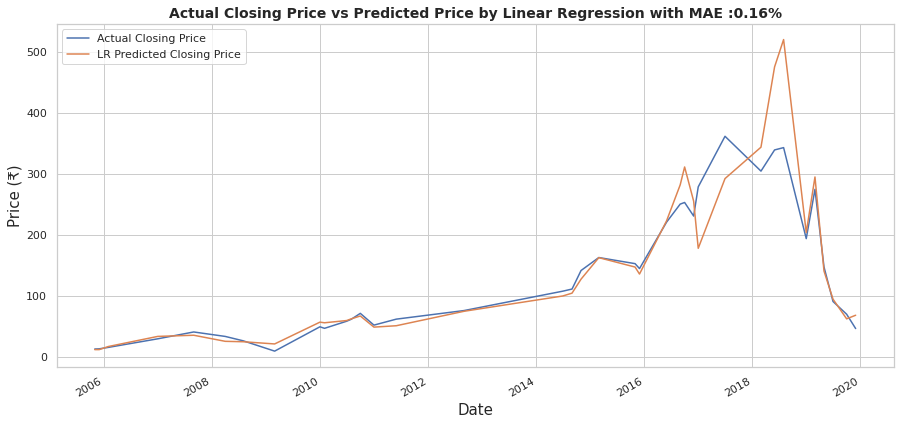

In [100]:
#Graph between Actual Close price and Predicted Price
sns.set(style='whitegrid')
test_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()